In [1]:
pip install .

Processing c:\users\ayior\onedrive - uva\1st semester\3rd block\project
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached torch-1.13.1-cp310-cp310-win_amd64.whl (162.6 MB)
  Using cached torchvision-0.14.1-cp310-cp310-win_amd64.whl (1.1 MB)
  Using cached captum-0.6.0-py3-none-any.whl (1.3 MB)
  Using cached hydra_core-1.3.1-py3-none-any.whl (154 kB)
  Using cached numpy-1.24.1-cp310-cp310-win_amd64.whl (14.8 MB)
     ---------------------------------------- 10.4/10.4 MB 6.9 MB/s eta 0:00:00
  Using cached scikit_image-0.19.3-cp310-cp310-win_amd64.whl (12.0 MB)
     ---------------------------------------- 8.3/8.3 MB 5.3 MB/s eta 0:00:00
  Using cached scipy-1.10.0-cp310-cp310-win_amd64.whl (42.5 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached wget-3.2.zip (10 kB)
  Preparing metadata

In [1]:
import torch
from pathlib import Path
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torch.nn import MSELoss
from captum.attr import IntegratedGradients

from lfxai.models.images import AutoEncoderMnist, EncoderMnist, DecoderMnist
from lfxai.models.pretext import Identity
from lfxai.explanations.features import attribute_auxiliary
from lfxai.explanations.examples import SimplEx

# Select torch device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Load data
data_dir = Path.cwd() / "data/mnist"
train_dataset = MNIST(data_dir, train=True, download=True)
test_dataset = MNIST(data_dir, train=False, download=True)
train_dataset.transform = transforms.Compose([transforms.ToTensor()])
test_dataset.transform = transforms.Compose([transforms.ToTensor()])
train_loader = DataLoader(train_dataset, batch_size=100)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

# Get a model
encoder = EncoderMnist(encoded_space_dim=10)
decoder = DecoderMnist(encoded_space_dim=10)
model = AutoEncoderMnist(encoder, decoder, latent_dim=10, input_pert=Identity())
model.to(device)

# Get label-free feature importance
baseline = torch.zeros((1, 1, 28, 28)).to(device) # black image as baseline
attr_method = IntegratedGradients(model)
feature_importance = attribute_auxiliary(encoder, test_loader,
                                         device, attr_method, baseline)

# Get label-free example importance
train_subset = Subset(train_dataset, indices=list(range(500))) # Limit the number of training examples
train_subloader = DataLoader(train_subset, batch_size=500)
attr_method = SimplEx(model, loss_f=MSELoss())
example_importance = attr_method.attribute_loader(device, train_subloader, test_loader)

In [1]:
# import logging
# import sys

# old_stdout = sys.stdout
# sys.stdout = open('logging.txt', 'w')
# logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
# sys.stdout = old_stdout


In [1]:
#MNIST Experiments
%run mnist.py --name consistency_features

2023-02-01 14:32:11,014 - INFO - Computing feature importance with Gradient Shap
2023-02-01 14:32:20,642 - INFO - Perturbing 5% of the features with Gradient Shap
2023-02-01 14:32:29,937 - INFO - Perturbing 10% of the features with Gradient Shap
2023-02-01 14:32:48,193 - INFO - Perturbing 20% of the features with Gradient Shap
2023-02-01 14:33:23,088 - INFO - Perturbing 50% of the features with Gradient Shap
2023-02-01 14:34:55,880 - INFO - Perturbing 80% of the features with Gradient Shap
2023-02-01 14:36:40,762 - INFO - Perturbing 100% of the features with Gradient Shap
2023-02-01 14:38:23,993 - INFO - Computing feature importance with Integrated Gradients
2023-02-01 14:40:42,892 - INFO - Perturbing 5% of the features with Integrated Gradients
2023-02-01 14:40:49,163 - INFO - Perturbing 10% of the features with Integrated Gradients
2023-02-01 14:40:59,753 - INFO - Perturbing 20% of the features with Integrated Gradients
2023-02-01 14:41:18,551 - INFO - Perturbing 50% of the features 

In [6]:
from IPython.display import IFrame
IFrame("results/mnist/consistency_features/mnist_consistency_features.pdf", width=600, height=500)

In [ ]:
# %run mnist.py --name consistency_features_with_deeplift

2023-02-01 15:28:10,797 - INFO - Now fitting autoencoder
2023-02-01 15:28:10,837 - INFO - Now fitting Influence Functions explainer
 63%|██████████████████████████████████████████████▌                           | 63/100 [00:10<00:06,  5.86recursion/s]


 27%|███████████████████▉                                                      | 27/100 [00:04<00:11,  6.13recursion/s]


 93%|████████████████████████████████████████████████████████████████████▊     | 93/100 [00:16<00:01,  5.47recursion/s]


 57%|██████████████████████████████████████████▏                               | 57/100 [00:10<00:08,  5.24recursion/s]


 21%|███████████████▌                                                          | 21/100 [00:03<00:14,  5.31recursion/s]


 87%|████████████████████████████████████████████████████████████████▍         | 87/100 [00:17<00:02,  5.00recursion/s]


 51%|█████████████████████████████████████▋                                    | 51/100 [00:10<00:10,  4.66recursion/s]


 15%|███████████                                                               | 15/100 [00:02<00:16,  5.18recursion/s]


 81%|███████████████████████████████████████████████████████████▉              | 81/100 [00:16<00:03,  5.65recursion/s]


 45%|█████████████████████████████████▎                                        | 45/100 [00:07<00:09,  5.70recursion/s]


  9%|██████▊                                                                    | 9/100 [00:01<00:16,  5.59recursion/s]


 75%|███████████████████████████████████████████████████████▌                  | 75/100 [00:13<00:06,  3.69recursion/s]


 39%|████████████████████████████▊                                             | 39/100 [00:07<00:10,  5.63recursion/s]


  3%|██▎                                                                        | 3/100 [00:00<00:15,  6.33recursion/s]


 69%|███████████████████████████████████████████████████                       | 69/100 [00:11<00:05,  5.88recursion/s]


 33%|████████████████████████▍                                                 | 33/100 [00:05<00:11,  6.04recursion/s]


 99%|█████████████████████████████████████████████████████████████████████████▎| 99/100 [00:16<00:00,  6.14recursion/s]


 63%|██████████████████████████████████████████████▌                           | 63/100 [00:12<00:08,  4.22recursion/s]


 27%|███████████████████▉                                                      | 27/100 [00:05<00:12,  5.69recursion/s]


 93%|████████████████████████████████████████████████████████████████████▊     | 93/100 [00:16<00:01,  5.79recursion/s]


 57%|██████████████████████████████████████████▏                               | 57/100 [00:10<00:07,  5.88recursion/s]


 21%|███████████████▌                                                          | 21/100 [00:03<00:13,  5.96recursion/s]


 87%|████████████████████████████████████████████████████████████████▍         | 87/100 [00:14<00:02,  5.57recursion/s]


 51%|█████████████████████████████████████▋                                    | 51/100 [00:08<00:08,  5.89recursion/s]


 15%|███████████                                                               | 15/100 [00:02<00:13,  6.15recursion/s]


 81%|███████████████████████████████████████████████████████████▉              | 81/100 [00:13<00:03,  5.95recursion/s]


 45%|█████████████████████████████████▎                                        | 45/100 [00:09<00:09,  5.55recursion/s]


  9%|██████▊                                                                    | 9/100 [00:01<00:16,  5.53recursion/s]


 75%|███████████████████████████████████████████████████████▌                  | 75/100 [00:13<00:04,  5.66recursion/s]


 39%|████████████████████████████▊                                             | 39/100 [00:06<00:11,  5.42recursion/s]


  3%|██▎                                                                        | 3/100 [00:00<00:17,  5.68recursion/s]


 69%|███████████████████████████████████████████████████                       | 69/100 [00:12<00:05,  5.56recursion/s]


 33%|████████████████████████▍                                                 | 33/100 [00:05<00:11,  5.63recursion/s]


 99%|█████████████████████████████████████████████████████████████████████████▎| 99/100 [00:17<00:00,  5.64recursion/s]


 63%|██████████████████████████████████████████████▌                           | 63/100 [00:10<00:06,  5.82recursion/s]


 27%|███████████████████▉                                                      | 27/100 [00:04<00:12,  5.67recursion/s]


 93%|████████████████████████████████████████████████████████████████████▊     | 93/100 [00:16<00:01,  5.61recursion/s]


 57%|██████████████████████████████████████████▏                               | 57/100 [00:10<00:07,  5.61recursion/s]


 21%|███████████████▌                                                          | 21/100 [00:04<00:14,  5.29recursion/s]


 87%|████████████████████████████████████████████████████████████████▍         | 87/100 [00:15<00:02,  5.75recursion/s]


 51%|█████████████████████████████████████▋                                    | 51/100 [00:08<00:08,  5.76recursion/s]


 15%|███████████                                                               | 15/100 [00:02<00:14,  5.81recursion/s]


 81%|███████████████████████████████████████████████████████████▉              | 81/100 [00:14<00:03,  5.89recursion/s]


 45%|█████████████████████████████████▎                                        | 45/100 [00:07<00:09,  5.75recursion/s]


  9%|██████▊                                                                    | 9/100 [00:01<00:16,  5.64recursion/s]


 75%|███████████████████████████████████████████████████████▌                  | 75/100 [00:13<00:04,  5.78recursion/s]


 39%|████████████████████████████▊                                             | 39/100 [00:06<00:10,  5.81recursion/s]


  3%|██▎                                                                        | 3/100 [00:00<00:16,  5.82recursion/s]


 69%|███████████████████████████████████████████████████                       | 69/100 [00:11<00:05,  5.56recursion/s]


 33%|████████████████████████▍                                                 | 33/100 [00:05<00:11,  5.86recursion/s]


 99%|█████████████████████████████████████████████████████████████████████████▎| 99/100 [00:20<00:00,  4.50recursion/s]


 63%|██████████████████████████████████████████████▌                           | 63/100 [00:11<00:06,  5.37recursion/s]


 27%|███████████████████▉                                                      | 27/100 [00:04<00:13,  5.62recursion/s]


 93%|████████████████████████████████████████████████████████████████████▊     | 93/100 [00:17<00:01,  5.41recursion/s]


 57%|██████████████████████████████████████████▏                               | 57/100 [00:11<00:08,  5.19recursion/s]


 21%|███████████████▌                                                          | 21/100 [00:03<00:14,  5.28recursion/s]


 87%|████████████████████████████████████████████████████████████████▍         | 87/100 [00:16<00:02,  5.63recursion/s]


 51%|█████████████████████████████████████▋                                    | 51/100 [00:09<00:09,  5.03recursion/s]


 15%|███████████                                                               | 15/100 [00:02<00:14,  5.68recursion/s]


 81%|███████████████████████████████████████████████████████████▉              | 81/100 [00:15<00:03,  5.14recursion/s]


 45%|█████████████████████████████████▎                                        | 45/100 [00:09<00:12,  4.42recursion/s]


  9%|██████▊                                                                    | 9/100 [00:01<00:17,  5.33recursion/s]


 75%|███████████████████████████████████████████████████████▌                  | 75/100 [00:14<00:04,  5.27recursion/s]


 39%|████████████████████████████▊                                             | 39/100 [00:07<00:11,  5.54recursion/s]


  3%|██▎                                                                        | 3/100 [00:00<00:17,  5.66recursion/s]


 69%|███████████████████████████████████████████████████                       | 69/100 [00:13<00:05,  5.38recursion/s]


 33%|████████████████████████▍                                                 | 33/100 [00:06<00:11,  5.64recursion/s]


 99%|█████████████████████████████████████████████████████████████████████████▎| 99/100 [00:17<00:00,  5.65recursion/s]


 63%|██████████████████████████████████████████████▌                           | 63/100 [00:11<00:06,  5.72recursion/s]


 27%|███████████████████▉                                                      | 27/100 [00:04<00:13,  5.48recursion/s]


 93%|████████████████████████████████████████████████████████████████████▊     | 93/100 [00:16<00:01,  5.44recursion/s]


 57%|██████████████████████████████████████████▏                               | 57/100 [00:10<00:07,  5.81recursion/s]


 21%|███████████████▌                                                          | 21/100 [00:03<00:14,  5.60recursion/s]


 87%|████████████████████████████████████████████████████████████████▍         | 87/100 [00:15<00:02,  5.46recursion/s]


 51%|█████████████████████████████████████▋                                    | 51/100 [00:09<00:08,  5.62recursion/s]


 15%|███████████                                                               | 15/100 [00:02<00:17,  4.90recursion/s]


 81%|███████████████████████████████████████████████████████████▉              | 81/100 [00:15<00:03,  5.70recursion/s]


100%|█████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.38recursion/s]


  0%|          | 0/2500 [00:00<?, ?it/s]

2023-02-01 15:43:28,249 - INFO - Now fitting TracIn explainer
2023-02-01 15:43:28,269 - INFO - Now fitting SimplEx explainer
2023-02-01 15:43:28,847 - INFO - Now fitting DKNN explainer                                                            
2023-02-01 15:43:28,949 - INFO - Saving results in C:\Users\ayior\OneDrive - UvA\1st Semester\3rd Block\Project\experiments\results\mnist\consistency_examples


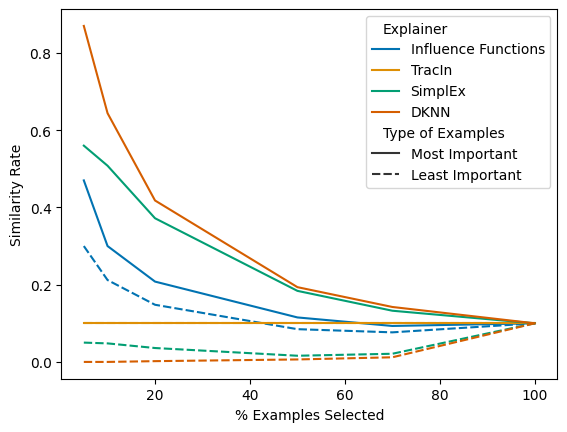

In [2]:
# 15 mins for size 50
# Default subtrain is 1000, it needs to be >=50
%run mnist.py --name consistency_examples --subtrain_size 50

In [ ]:
%run mnist.py --name roar_test

2023-02-01 16:16:25,175 - INFO - Welcome in the ROAR test experiments
2023-02-01 16:16:26,907 - INFO - Computing feature importance with Gradient Shap
2023-02-01 16:16:59,374 - INFO - Retraining an autoencoder with 10% pixels masked by Gradient Shap
2023-02-01 16:17:50,332 - INFO - Retraining an autoencoder with 20% pixels masked by Gradient Shap
2023-02-01 16:19:27,642 - INFO - Retraining an autoencoder with 50% pixels masked by Gradient Shap
2023-02-01 16:23:26,350 - INFO - Retraining an autoencoder with 70% pixels masked by Gradient Shap
2023-02-01 16:28:52,181 - INFO - Retraining an autoencoder with 100% pixels masked by Gradient Shap
2023-02-01 16:45:49,935 - INFO - Computing feature importance with Integrated Gradients
2023-02-01 17:03:23,637 - INFO - Retraining an autoencoder with 10% pixels masked by Integrated Gradients
2023-02-01 17:04:16,464 - INFO - Retraining an autoencoder with 20% pixels masked by Integrated Gradients
2023-02-01 17:06:00,038 - INFO - Retraining an autoen

In [ ]:
# options for method: gradient_shap, integrated_gradients, saliency
# default gradient_shap
%run mnist.py --name pretext --n_runs 1 --method gradient_shap

2023-02-01 14:17:47,077 - INFO - Creating saving directory C:\Users\ayior\OneDrive - UvA\1st Semester\3rd Block\Project\experiments\results\mnist\pretext
2023-02-01 14:17:47,110 - INFO - Now fitting Reconstruction-ae_run0
 90%|█████████ | 181/200 [00:18<00:02,  9.40batch/s]

In [ ]:
# options for method: gradient_shap, integrated_gradients, saliency
# default gradient_shap
%run mnist.py --name disvae --n_runs 1 --method gradient_shap

In [ ]:
#ECG Experiments
%run ecg5000.py --name consistency_features 

In [ ]:
%run ecg5000.py --name consistency_examples

In [ ]:
%run cifar10.py 

C:\Users\ayior\OneDrive - UvA\1st Semester\3rd Block\Project\experiments\cifar10.py:283: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name="simclr_config.yaml", config_path=str(Path.cwd()))
C:\Users\ayior\anaconda3\envs\env1\lib\site-packages\hydra\_internal\hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  ret = run_job(
C:\Users\ayior\anaconda3\envs\env1\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ayior\anaconda3\envs\env1\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for

seed = 42
[2023-01-31 22:14:34,450][root][INFO] - Base model: resnet18 - feature dim: 512 - projection dim 128
[2023-01-31 22:14:35,258][root][INFO] - Computing feature importance with Gradient Shap


In [ ]:
#Dsprites experiments
%run dsprites

2023-01-31 22:10:56,499 - INFO - Now fitting Beta-vae_beta1_run1
  0%|▏                                                                             | 3/1328 [00:15<1:56:33,  5.28s/batches]